In [76]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [25]:
with open('../experiment_12/result/training_0/performance_history', 'rb') as file:
    history = pickle.load(file)

In [26]:
history

{'loss': [0.27467058552638146,
  0.14749309146288794,
  0.14007454216385434,
  0.13815902948999015,
  0.13776676203919505],
 'rmse': [0.4831803, 0.37620217, 0.3661894, 0.36347064, 0.36291042],
 'r2': [-0.37247518, 0.28750983, 0.3216999, 0.33050433, 0.3323357],
 'R2': [-0.06850558, 0.42568484, 0.45459616, 0.46203932, 0.46359277],
 'tf_R2': [-0.30343735, 0.2994943, 0.33470085, 0.34370616, 0.34572506],
 'val_loss': [0.15409627410271423,
  0.13856384903592875,
  0.13658105297347412,
  0.13506235924540894,
  0.1372855735971747],
 'val_rmse': [0.38462994, 0.36393335, 0.36075658, 0.35898986, 0.3615503],
 'val_r2': [0.25260076, 0.32472482, 0.33459342, 0.34236515, 0.3294658],
 'val_R2': [0.3994697, 0.46003145, 0.46763217, 0.47352722, 0.46490392],
 'val_tf_R2': [0.2673081, 0.34119827, 0.3504916, 0.35768163, 0.34714648]}

In [27]:
file.close()

In [84]:
def show_result(history, metric_label='RMSE'): 

    epochs = range(1, int(len(history['loss'])) + 1)   

    # Define a subplot 
    fig, axs = plt.subplots(3,1,figsize=(8,16))

    # Plot loss
    loss_plot = axs[0]

    loss_plot.plot(epochs, history['loss'], 'c--', label='Training Loss')
    loss_plot.plot(epochs, history['val_loss'], 'b', label='Validation Loss')
    loss_plot.annotate('Validate\n%0.4f' % history['val_loss'][-1], xy=(1, history['val_loss'][-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
    loss_plot.set_title('Training and Validation Loss')
    loss_plot.set_xlabel('Epochs')
    loss_plot.set_ylabel('Loss')
    loss_plot.legend()
    loss_plot.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Plot accuracy
    met_plot = axs[1]

    met_plot.plot(epochs, history['rmse'], 'c--', label='Training %s'%metric_label)
    met_plot.plot(epochs, history['val_rmse'], 'b', label='Validation %s'%metric_label)
    met_plot.annotate('Validate\n%0.4f' % history['val_rmse'][-1], xy=(1, history['val_rmse'][-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
    met_plot.set_title('Training and Validation RMSE')
    met_plot.set_xlabel('Epochs')
    met_plot.set_ylabel(metric_label)
    met_plot.legend()
    met_plot.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    r2_plot = axs[2]
    r2_plot.plot(epochs, history['R2'], 'c--', label='Training %s'%metric_label)
    r2_plot.plot(epochs, history['val_R2'], 'b', label='Validation %s'%metric_label)
    
    r2_plot.annotate('Validate\n%0.4f' % history['val_R2'][-1], xy=(1, history['val_R2'][-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
    r2_plot.set_title('Training and Validation R2')
    r2_plot.set_xlabel('Epochs')
    r2_plot.set_ylabel(metric_label)
    r2_plot.legend()
    r2_plot.xaxis.set_major_locator(MaxNLocator(integer=True))

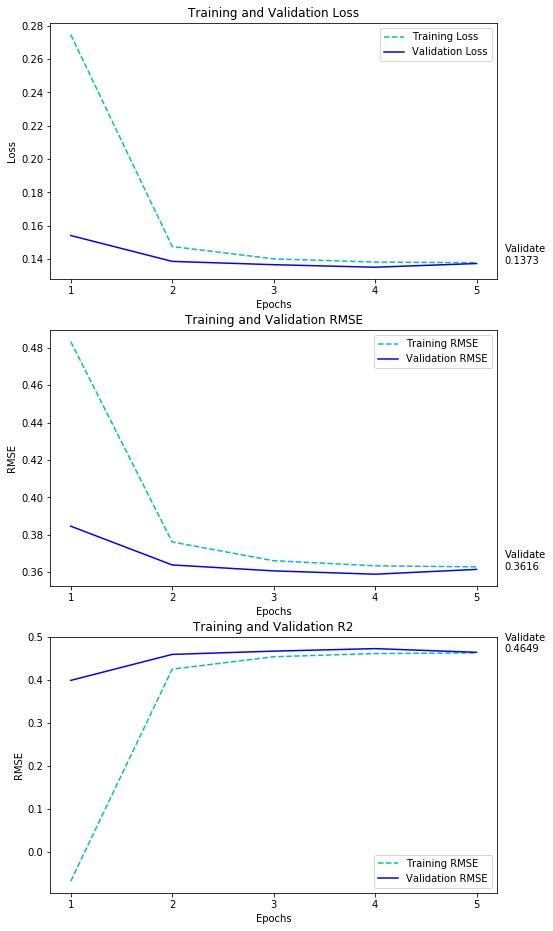

In [85]:
show_result(history, metric_label='RMSE')